In [1]:
# Импорт библиотек
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Загрузка и обработка данных
output_path = 'output.xlsx'
dataset = pd.read_excel(output_path)
dataset_copy = dataset.copy()
display(dataset_copy)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,сenter
2,Владимирская область,5802,8902,1703,1468,320,сenter
3,Воронежская область,9292,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
...,...,...,...,...,...,...,...
67,Приморский край,6485,12822,2049,1812,2380,dv
68,Хабаровский край,5689,10688,1877,1648,1800,dv
69,Амурская область,2954,7211,929,977,829,dv
70,Сахалинская область,3332,4511,792,507,131,dv


In [3]:
# Замена названий округов на соответствующие номерные значения
dataset_copy = dataset_copy.replace(
    ['сenter', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1, 2, 3, 4, 5, 6, 7, 8])

dataset_copy.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,1
1,Брянская область,4560,10211,1538,1418,837,1
2,Владимирская область,5802,8902,1703,1468,320,1
3,Воронежская область,9292,17186,3362,2458,4347,1
4,Ивановская область,4495,5649,1338,977,1288,1
...,...,...,...,...,...,...,...
67,Приморский край,6485,12822,2049,1812,2380,8
68,Хабаровский край,5689,10688,1877,1648,1800,8
69,Амурская область,2954,7211,929,977,829,8
70,Сахалинская область,3332,4511,792,507,131,8


<Axes: xlabel='x1', ylabel='x2'>

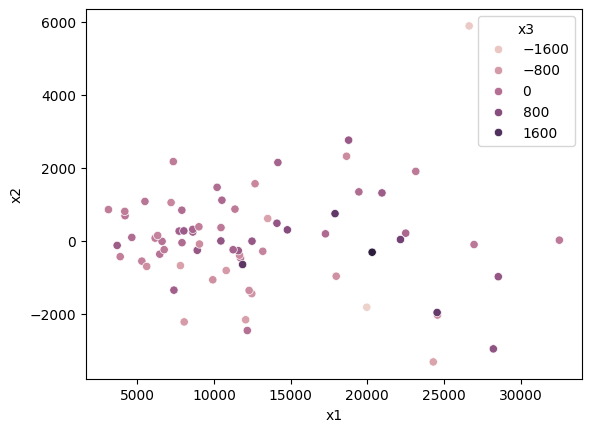

In [4]:
# Представление датасета в виде трехмерного массива
svd = TruncatedSVD(3)
dataset_svd = svd.fit_transform(dataset_copy.loc[:, 'x1':'x5'])
dataset_svd = pd.DataFrame(dataset_svd, columns=['x1', 'x2', 'x3'])

sns.scatterplot(data=dataset_svd, x='x1', y='x2', hue='x3')


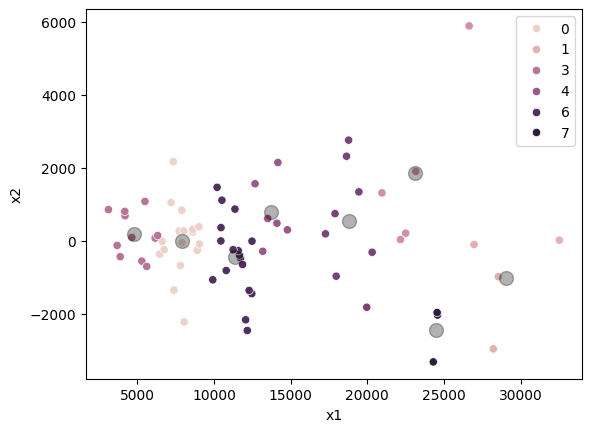

In [5]:
# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=8, n_init='auto').fit(dataset_svd)
y_kmeans = kmeans.predict(dataset_svd)

sns.scatterplot(data=dataset_svd, x='x1', y='x2', hue=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3)

In [6]:
# Классификация с использованием KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(dataset_copy.loc[:, 'x1':'x5'], dataset_copy.loc[:, 'Округ'])

dv = dataset_copy.loc[dataset_copy['Округ'] == 8]

for i in range(len(dataset_copy.loc[:, 'Округ'])):
    if dataset_copy['Округ'][i] == 8:
        dataset_copy.drop(i, inplace=True)

dv.reset_index(drop=True, inplace=True)
display(dv)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Республика Бурятия,3377,9471,1806,1285,768,8
1,Республика Саха (Якутия),6770,17212,2850,1474,1169,8
2,Забайкальский край,4672,11712,1550,1178,781,8
3,Камчатский край,2202,3129,783,341,132,8
4,Приморский край,6485,12822,2049,1812,2380,8
5,Хабаровский край,5689,10688,1877,1648,1800,8
6,Амурская область,2954,7211,929,977,829,8
7,Сахалинская область,3332,4511,792,507,131,8
8,Еврейская автономная область,803,3129,175,187,57,8


In [7]:
pred_dv = knn.predict(dv.loc[:, 'x1':'x5'])
for i in range(len(pred_dv)):
    dv.loc[i, 'Округ'] = pred_dv[i]

display(dv)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Республика Бурятия,3377,9471,1806,1285,768,1
1,Республика Саха (Якутия),6770,17212,2850,1474,1169,3
2,Забайкальский край,4672,11712,1550,1178,781,1
3,Камчатский край,2202,3129,783,341,132,3
4,Приморский край,6485,12822,2049,1812,2380,1
5,Хабаровский край,5689,10688,1877,1648,1800,5
6,Амурская область,2954,7211,929,977,829,1
7,Сахалинская область,3332,4511,792,507,131,2
8,Еврейская автономная область,803,3129,175,187,57,3


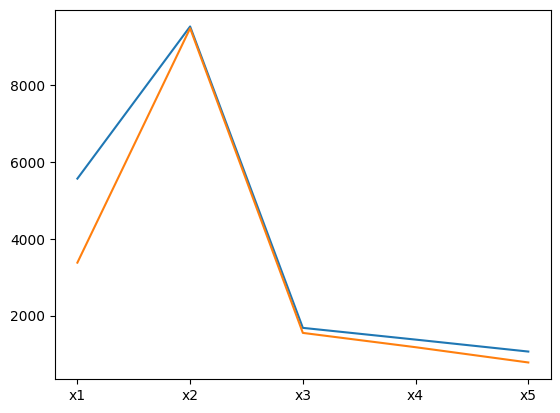

In [8]:
# Визуализация медиан по каждому признаку
plt.plot(dataset_copy.loc[:, 'x1':'x5'].median())
plt.plot(dv.loc[:, 'x1':'x5'].median())

plt.show()